# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | san jose del cabo
Processing Record 5 of Set 1 | aripuana
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ndikinimeki
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | al khaburah
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | bisbee
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | freetown
Processing Record 20 of Set 1 | manado
Processing Record 21 of Set 1 | aibak
Processing Record 22 of Set 1 | whistler
Proces

City not found. Skipping...
Processing Record 38 of Set 4 | gorno-altaysk
Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | mastic beach
Processing Record 41 of Set 4 | semporna
Processing Record 42 of Set 4 | ridgecrest
Processing Record 43 of Set 4 | kerikeri
Processing Record 44 of Set 4 | cassilandia
Processing Record 45 of Set 4 | fukuecho
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | banikoara
Processing Record 48 of Set 4 | malpe
Processing Record 49 of Set 4 | bredasdorp
Processing Record 0 of Set 5 | alice springs
Processing Record 1 of Set 5 | singkil
Processing Record 2 of Set 5 | aykhal
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | sanctuary point
Processing Record 5 of Set 5 | timmins
Processing Record 6 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 5 | tauranga
Processing Record 8 of Set 5 | panaba
Processing Record 9 of Set 5 | punalur
Processing Record 10 of Se

Processing Record 29 of Set 8 | narasaraopet
Processing Record 30 of Set 8 | boyolangu
Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | colonia
Processing Record 36 of Set 8 | tongliao
Processing Record 37 of Set 8 | hailin
Processing Record 38 of Set 8 | laboulaye
Processing Record 39 of Set 8 | visby
Processing Record 40 of Set 8 | amalapuram
Processing Record 41 of Set 8 | iwaki
Processing Record 42 of Set 8 | east london
Processing Record 43 of Set 8 | takoradi
Processing Record 44 of Set 8 | coxim
Processing Record 45 of Set 8 | pandan
Processing Record 46 of Set 8 | colonel hill
Processing Record 47 of Set 8 | peace river
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | villa ojo de agua
Processing Record 0 of Set 9 | haiku-pauwela
Processing Record 1 of Set 9 | segezha
Processing Record 2 of Set 9 | zouer

City not found. Skipping...
Processing Record 19 of Set 12 | tiassale
Processing Record 20 of Set 12 | hollidaysburg
Processing Record 21 of Set 12 | fort st. john
Processing Record 22 of Set 12 | bemidji
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | ubari
Processing Record 25 of Set 12 | palmer
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,247.27,98,34,2.14,RU,1702257754
1,grytviken,-54.2811,-36.5092,278.77,93,100,6.73,GS,1702257536
2,gadzhiyevo,69.2551,33.3362,259.25,91,88,7.06,RU,1702257754
3,san jose del cabo,23.0589,-109.6977,300.23,67,0,7.72,MX,1702257754
4,aripuana,-9.1667,-60.6333,297.20,94,100,0.74,BR,1702257754


In [6]:
import os
#Permissions were denied to connect to data_output folder so making path 
# Create the 'output_data' directory
output_data_dir = os.path.join("output_data")
output_file_path = os.path.join(output_data_dir, "cities.csv")


In [7]:
# Export the City_Data into a csv
output_file_path = "output_data/cities.csv"
city_data_df.to_csv(output_file_path, index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,247.27,98,34,2.14,RU,1702257754
1,grytviken,-54.2811,-36.5092,278.77,93,100,6.73,GS,1702257536
2,gadzhiyevo,69.2551,33.3362,259.25,91,88,7.06,RU,1702257754
3,san jose del cabo,23.0589,-109.6977,300.23,67,0,7.72,MX,1702257754
4,aripuana,-9.1667,-60.6333,297.20,94,100,0.74,BR,1702257754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

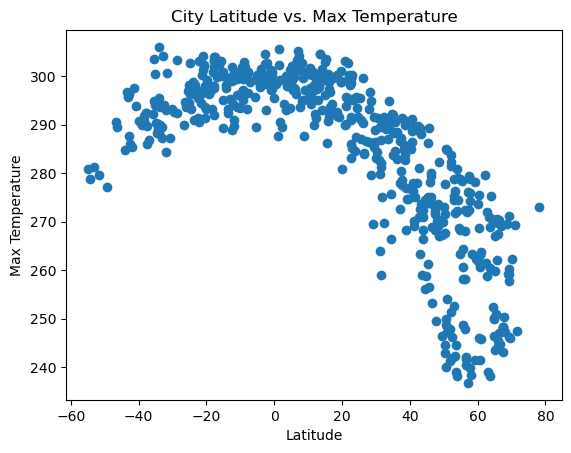

In [9]:
import matplotlib.pyplot as plt

# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

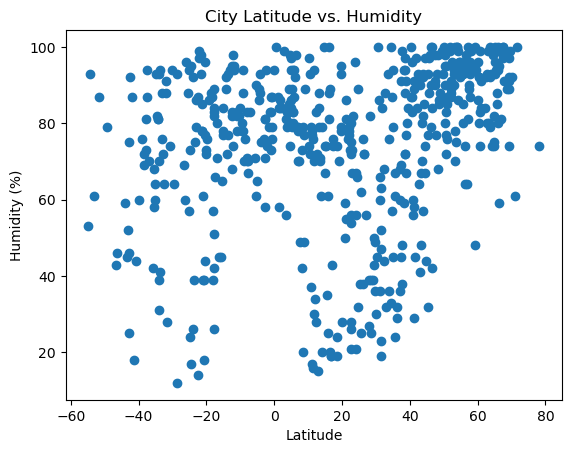

In [10]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

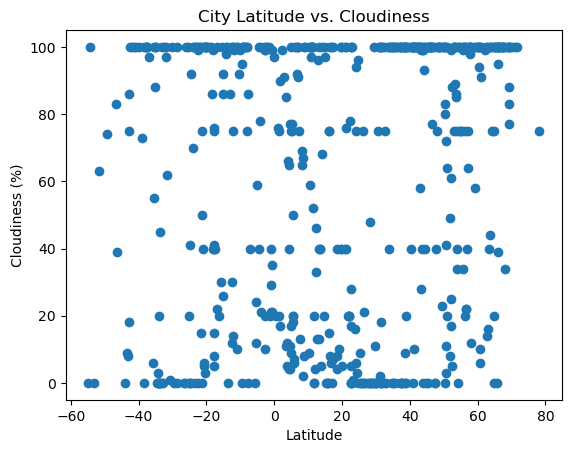

In [11]:
# Scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

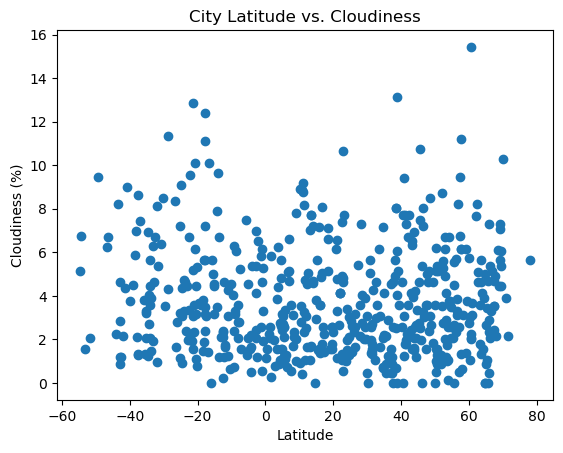

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,247.27,98,34,2.14,RU,1702257754
2,gadzhiyevo,69.2551,33.3362,259.25,91,88,7.06,RU,1702257754
3,san jose del cabo,23.0589,-109.6977,300.23,67,0,7.72,MX,1702257754
5,yellowknife,62.4560,-114.3525,261.44,92,100,8.23,CA,1702257534
7,ndikinimeki,4.7667,10.8333,293.47,98,77,1.55,CM,1702257754


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,278.77,93,100,6.73,GS,1702257536
4,aripuana,-9.1667,-60.6333,297.20,94,100,0.74,BR,1702257754
6,port-aux-francais,-49.3500,70.2167,277.16,79,74,9.47,TF,1702257754
10,namibe,-15.1961,12.1522,295.06,78,86,3.15,AO,1702257755
13,waitangi,-43.9535,-176.5597,284.79,59,0,2.24,NZ,1702257755


###  Temperature vs. Latitude Linear Regression Plot

The line equation is: y = -0.75x + 306.56
The r-value is: -0.826657713744905


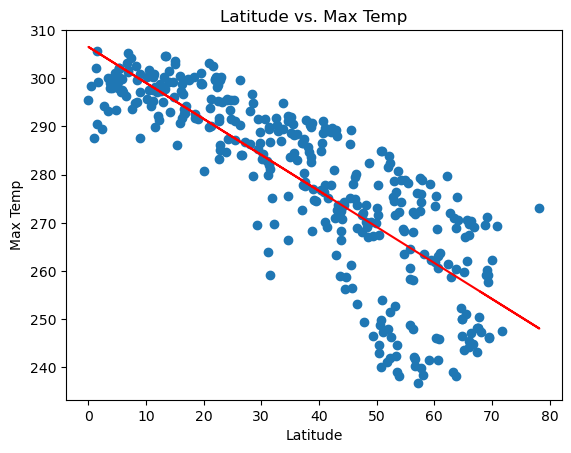

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.25x + 301.19
The r-value is: 0.60437257862345


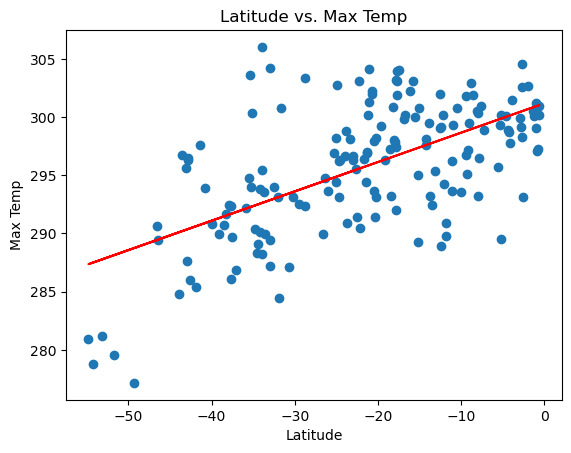

In [17]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [18]:
#Response: The temperatures increase the closer the city is to the equator or 0 latitude.

### Humidity vs. Latitude Linear Regression Plot

The line equation is: y = 0.39x + 61.3
The r-value is: 0.3493951633622787


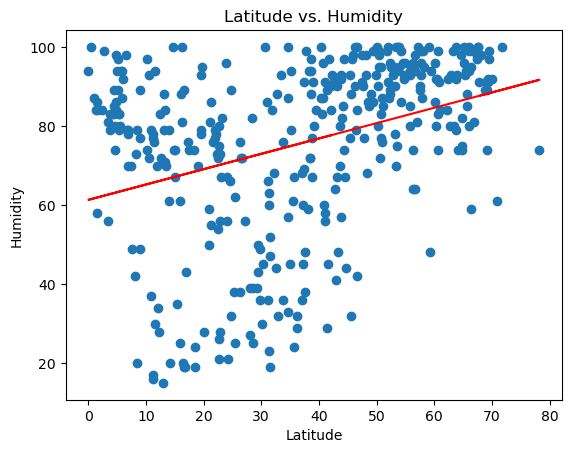

In [19]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.39x + 80.42
The r-value is: 0.25799439326382134


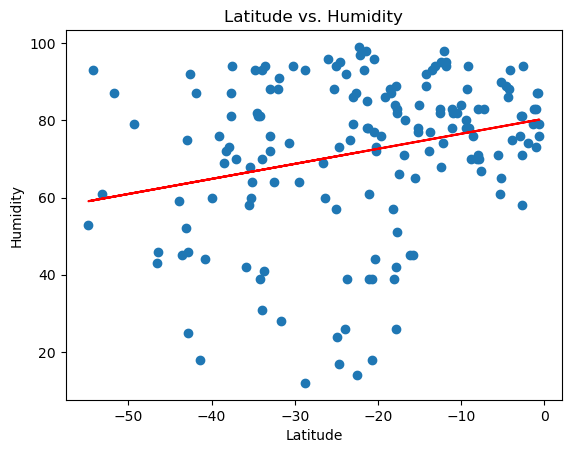

In [20]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [21]:
#There is no strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The line equation is: y = 0.63x + 39.49
The r-value is: 0.3061377965092539


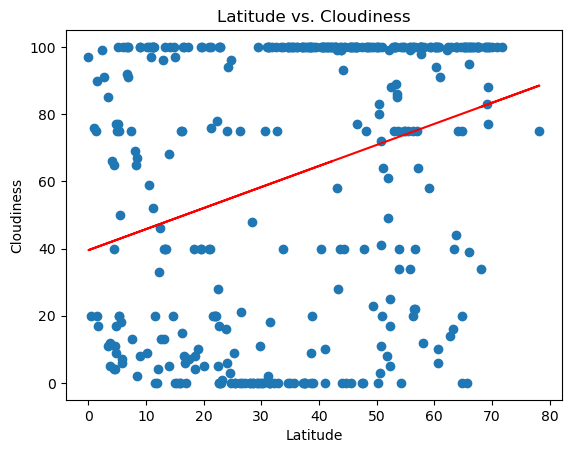

In [22]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.26x + 65.38
The r-value is: 0.08369067508703223


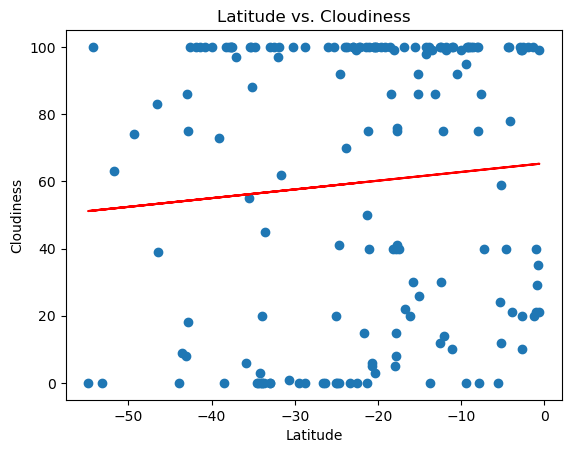

In [23]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [24]:
#There is no correlation between latitue and cloudiness

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The line equation is: y = 0.01x + 3.07
The r-value is: 0.10377285836708461


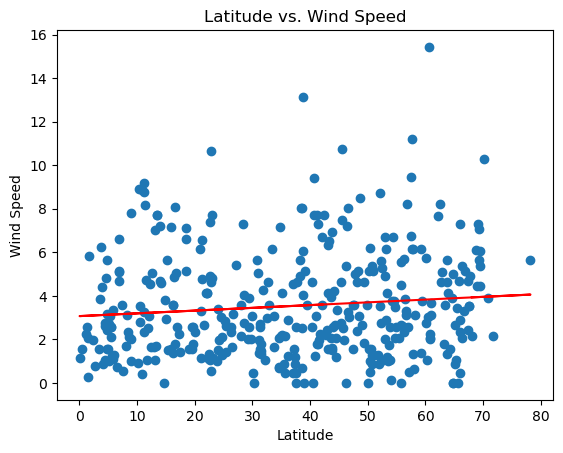

In [25]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = -0.02x + 3.56
The r-value is: -0.12345213560420257


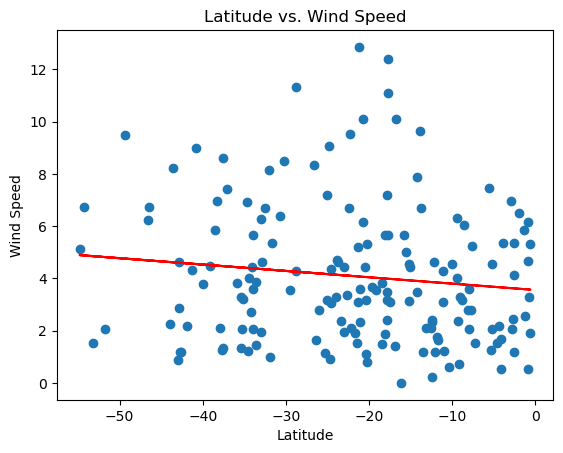

In [26]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [33]:
#There is no correlation between wind speed and latitude on either hemisphere. 